<div id="container" style="position:relative;">
<div style="float:centre"><h1> Yelp Review Analysis </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
<div style="position:relative; float:left"><h4> by Lavanya Kwatra (August, 2020) </h4></div>
</div>


## Data Cleaning

Reading in the `sample.csv` created in the previous notebook, we will explore the different columns with respect to our goal to explore the sentiment analysis of reviews and social perception of restaurants in the Yelp community.

In [1]:
# importing required packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# reading in data from sample.csv uploaded to S3 bucket on AWS
main = pd.read_csv('s3://yelp/sample.csv', index_col=0)
main.shape

(501320, 43)

In [3]:
# to view all columns of dataframe
pd.set_option('display.max_columns', None)

In [4]:
# viewing the head of the dataframe
main.head()

,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,name_x,address,city,state,postal_code,latitude,longitude,stars_y,review_count_x,is_open,attributes,categories,hours,name_y,review_count_y,yelping_since,useful_y,funny_y,cool_y,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
6836398,TWhVfhK2LvLu8I_0yOzA-w,tcBOEF8KeCZ_sgMIaOWcww,_r-OvLO5wqncmsBCg3i0qw,5,0,0,0,This has been my boyfriend and mine's absolute...,2018-10-06 19:41:58,Pomo Pizzeria - Gilbert,"366 N Gilbert Rd, Ste 106",Gilbert,AZ,85234,33.356514,-111.790061,3.5,418,1,"{'OutdoorSeating': 'True', 'RestaurantsTableSe...","Restaurants, Pizza, Italian","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...",Sami,2,2015-05-15 04:55:28,2,0,0,NaN,None,0,3.40,0,0,0,0,0,0,1,0,0,0,0
3116144,62OzqwbJcxEVb38-jM_kSA,WxEfKKXhGOwy13RokqSGvw,-av1lZI1JDY_RZN2eTMnWg,5,0,0,0,This is one of my favorite Thai restaruant. T...,2014-05-27 03:11:36,Salad King Restaurant,340 Yonge Street,Toronto,ON,M5B 1R8,43.657648,-79.381728,3.5,948,1,"{'HasTV': 'False', 'RestaurantsTakeOut': 'True...","Thai, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",Jenny,12,2014-05-27 02:53:10,1,1,0,NaN,i6ZDJFeypkj6kCvSFjMbyg,0,3.93,0,0,0,0,0,0,0,0,0,0,0
4420701,1uUp7SatdBbnubccwNNWig,V_fAi3s5pHoecneF_s199Q,3BvoqrkBhqnrCeSnuZY-9w,5,0,0,0,This is my favorite PT's! I live much closer t...,2019-04-27 04:46:30,Pt's Gold,10075 S Eastern Ave,Henderson,NV,89052,36.005099,-115.112716,3.0,70,1,"{'RestaurantsTakeOut': 'True', 'BikeParking': ...","American (Traditional), Nightlife, Bars, Sport...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",Charity,4,2016-06-13 03:18:34,0,0,0,NaN,None,0,4.20,0,0,0,0,0,1,0,0,0,0,0
5678687,DsegcK7Om9H4I5Qra9UCnQ,jqVdSktqINWLxPMYojqaKQ,KXiwq_g2w1Sh4Y7_1nNS1Q,5,0,0,0,Dr. Rosenblitt was my dentist while I lived in...,2009-07-03 14:30:00,"Paul J Rosenblitt, DDS - Rosenblitt Dental","526 Superior Ave E, Ste 109",Cleveland,OH,44114,41.500967,-81.690288,5.0,42,1,"{'ByAppointmentOnly': 'True', 'AcceptsInsuranc...","Health & Medical, General Dentistry, Dentists","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",Shalini,58,2009-07-02 22:58:48,131,31,15,NaN,"YCO8mfUEf26Lko4jWXcM1Q, qM-d89XwxKeG6iZfOnOhSw...",1,3.15,0,0,0,0,0,2,2,1,1,1,0
7320706,ibkd8ceZcouF_vGVkX-7Vw,IkNg0F3M5KKCVn5ioXbztg,4vDffQ7eSQ7n39cyroOSKQ,5,0,0,0,Loved the atmosphere and enjoyed my evening he...,2017-11-24 00:51:53,Crave Dessert Bar,"500 W 5th St, Ste 120",Charlotte,NC,28202,35.231755,-80.845693,3.5,535,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Hookah Bars, Restaurants, Nightlife, Bars, Lou...","{'Monday': '0:0-0:0', 'Tuesday': '17:0-2:0', '...",Lynda,10,2014-11-03 13:05:30,2,2,0,NaN,None,1,4.00,0,0,0,0,0,0,0,0,0,0,0


## Data Dictionary 

From the extensive Yelp documentation and based on the way the columns were read into this dataframe, let's explore what each of these columns convey.

#### business.json columns: 
Contains business data including location data, attributes, and categories.

1. business_id = the unique 22 character business id, as a string
2. address = the full address of the business, as a string
3. city = the city where the business is located, as a string
4. state = the 2 character state code where the business is located, as a string
5. postal_code = the postal code of the business, as a string
6. latitude = geographical coordinates, as a float
7. longitude = geographical coordinates, as a float
8. stars_y = the rating of the business rounded to half-stars, as a float
9. review_count_x = the number of reviews received by the business, as an integer
10. is_open = 0 or 1 for whether the business is closed or open, as an integer
11. attributes = an object of the key business attributes & their values, where some values are objects themselves
12. categories = an array of strings of business categories
13. hours = an object of key days to value hours using a 24 hour format
   
#### review.json columns:
Contains full review text data including the user_id that wrote the review and the business_id the review is written for.

1. review_id = the unique 22 character review id, as a string
2. user_id = the unique 22 character user id, as a string
3. business_id = the unique 22 character business id, as a string
4. stars_x = star rating with the corresponding review, as an integer
5. date = the date the review was posted, in the format YYYY-MM-DD, as a string
6. text = the review itself, as a string
7. useful_x = the number of useful votes received by the review, as an integer
8. funny_x = the number of funny votes received by the review, as an integer
9. cool_x = the number of cool votes received by the review, as an integer

#### user.json columns:
User data including the user's friend mapping and all the metadata associated with the user.

1. user_id = the unique 22 character user id, as a string
2. name_y = the name of the user, as a string
3. review_count_y = the number of reviews written by the user, as an integer
4. yelping_since = the date when the user joined Yelp, in the format YYYY-MM-DD, as a string
5. friends = the strings od user's friends' unique user_ids, as an array
6. useful_y = the number of useful votes sent by the user, as an integer
7. funny_y = the number of funny votes sent by the user, as an integer
8. cool_y = the number of cool votes sent by the user, as an integer
9. fans = the number of fans the user has, as an integer
10. elite = the years the user was elite, as an array
11. average_stars = the average rating of all reviews written by the user, as a float
12. compliment_hot = the number of "hot" compliments received by the user, as an integer
13. compliment_more = the number of "more" compliments received by the user, as an integer
14. compliment_profile = the number of "profile" compliments received by the user, as an integer
15. compliment_cute = the number of "cute" compliments received by the user, as an integer
16. compliment_list = the number of "list" compliments received by the user, as an integer
17. compliment_note = the number of "note" compliments received by the user, as an integer
18. compliment_plain = the number of "plain" compliments received by the user, as an integer
19. compliment_cool = the number of "cool" compliments received by the user, as an integer
20. compliment_funny = the number of "funny" compliments received by the user, as an integer
21. compliment_writer = the number of "writer" compliments received by the user, as an integer
22. compliment_photo = the number of "photo" compliments received by the user, as an integer

In [9]:
# resetting the index to drop the unnamed column
main.reset_index(drop=True, inplace=True)

In [10]:
# Exploring columns in the dataframe
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501320 entries, 0 to 501319
Data columns (total 43 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   review_id           501320 non-null  object 
 1   user_id             501320 non-null  object 
 2   business_id         501320 non-null  object 
 3   stars_x             501320 non-null  int64  
 4   useful_x            501320 non-null  int64  
 5   funny_x             501320 non-null  int64  
 6   cool_x              501320 non-null  int64  
 7   text                501320 non-null  object 
 8   date                501320 non-null  object 
 9   name_x              501320 non-null  object 
 10  address             493684 non-null  object 
 11  city                501320 non-null  object 
 12  state               501320 non-null  object 
 13  postal_code         501008 non-null  object 
 14  latitude            501320 non-null  float64
 15  longitude           501320 non-nul

In [11]:
# exploring the datatypes of each column
main.dtypes

review_id              object
user_id                object
business_id            object
stars_x                 int64
useful_x                int64
funny_x                 int64
cool_x                  int64
text                   object
date                   object
name_x                 object
address                object
city                   object
state                  object
postal_code            object
latitude              float64
longitude             float64
stars_y               float64
review_count_x          int64
is_open                 int64
attributes             object
categories             object
hours                  object
name_y                 object
review_count_y          int64
yelping_since          object
useful_y                int64
funny_y                 int64
cool_y                  int64
elite                  object
friends                object
fans                    int64
average_stars         float64
compliment_hot          int64
compliment

## Preliminary Filtering & Feature Engineering:

Based on the column & data type exploration above, the following preliminary cleaning steps are chosen:

- Only keep datapoints for businesses that are still open
- String cleaning operations: removing punctuation, removing digits and convert all text to lowercase 
- Drop column `elite` since more than 50% of the data is missing (for future purposes, this is likely important to explore with respect to user lifespan or status)
- Drop the single missing value in `name_y` column
- Filter through categories to only retain reviews for businesses with the word "Restaurants" in the category tags
- Drop `hours` column about business hours, this is not relevant at the moment for our sentiment classification
- Convert `yelping_since` and `date` to datetime objects from string, then calculate the age of the user at the time of writing the review,  `review_user_age` and extracting the number of days as `user_lifespan` 
- The aggregated mean of `user_lifespan` grouped by `user_id` is the average `user_lifespan` metric that can be used to evaluate how long the user has been active on Yelp. However, this is an aggregated mean grouped by user and will be relevant for clustering. Therefore, we can ignore this for our classification model.
- Rename columns to separate into user, business & review attributes for further steps
- Drop 10 compliment attribute columns that correspond to each user since the explanation is not explicit (for future purposes, explore the attributes and how they are calculated)
- Select a random representative sample of the main dataframe
- Create a function to select relevant columns & generate 5 separate dataframes from the main

Citations for Preprocessing Steps:
1. https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string
2. https://stackoverflow.com/questions/54188779/how-to-convert-timedelta64-to-number-of-days-integer
3. https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
4. https://stackoverflow.com/questions/34682828/extracting-specific-selected-columns-to-new-dataframe-as-a-copy

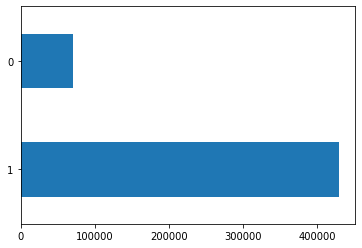

1    429964
0     71356
Name: is_open, dtype: int64

In [18]:
# visualizing the proportion of open and closed businesses
plt.figure()
main['is_open'].value_counts().plot(kind='barh')
plt.show()
display(main['is_open'].value_counts())

In [19]:
# dropping reviews for closed businesses
main = main[main['is_open']==True]

In [20]:
# checking to confirm
main.shape

(429964, 43)

In [21]:
# dropping the is_open column as it is not relevant anymore
main.drop(columns=['is_open'], inplace=True)

In [22]:
# import package for string cleaning operations
import string

In [23]:
# refer to stackoverflow link for string cleaning 
# removing all special characters, digits and converting to lower case

main['text'] = main['text'].str.translate(str.maketrans('', '', string.punctuation))
main['text'] = main['text'].str.translate(str.maketrans('', '', string.digits))
main['text'] = main['text'].str.lower()

In [24]:
# just to check..
main['text']

0         this has been my boyfriend and mines absolute ...
1         this is one of my favorite thai restaruant  th...
2         this is my favorite pts i live much closer to ...
3         dr rosenblitt was my dentist while i lived in ...
4         loved the atmosphere and enjoyed my evening he...
                                ...                        
501315    amazing best thai food delicious and fresh gre...
501316    the day club entrance is on nd floor of cosmop...
501317    i really wanted to love this place my boyfrien...
501318    i got a coupon in the mail so i gave this salo...
501319    we arrived as a group of  and i think we order...
Name: text, Length: 429964, dtype: object

In [26]:
# checking the proportion of missing values for the elite column
main['elite'].isna().sum()/len(main['elite'])

0.7874008056488451

In [27]:
# dropping this column since it barely has any information about the users
# later on, may be useful to explore which datapoints have values 
main.drop(columns=['elite'], inplace=True)

In [28]:
# dropping 1 missing row
main['name_y'].dropna(inplace=True)

In [29]:
# exploring the categories column 
main['categories']

0                               Restaurants, Pizza, Italian
1                                         Thai, Restaurants
2         American (Traditional), Nightlife, Bars, Sport...
3             Health & Medical, General Dentistry, Dentists
4         Hookah Bars, Restaurants, Nightlife, Bars, Lou...
                                ...                        
501315      Thai, Seafood, Restaurants, Vegetarian, Noodles
501316    Arts & Entertainment, Nightlife, Dance Clubs, ...
501317                    Japanese, Restaurants, Sushi Bars
501318    Eyelash Service, Tanning, Beauty & Spas, Day S...
501319               Japanese, Chinese, Korean, Restaurants
Name: categories, Length: 429964, dtype: object

This is a column of string objects separated by " ," and if there is the word "Restaurants" in any order, then the business is a restaurant. The concept is, all places that serve food are restaurants, but not all places that serve food are Italian restaurants. 

In [30]:
# creating a column to filter for only restaurants
main['is_restaurant'] = main['categories'].str.contains('Restaurants')

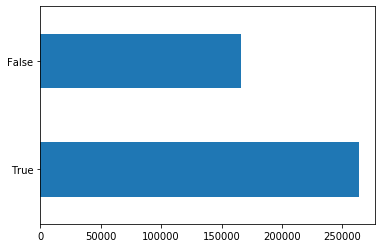

True     263840
False    166001
Name: is_restaurant, dtype: int64

In [31]:
# visualizing the proportion of restaurants
plt.figure()
main['is_restaurant'].value_counts().plot(kind='barh')
plt.show()
display(main['is_restaurant'].value_counts())

In [32]:
# dropping businesses that are not restaurants
main = main[main['is_restaurant']==True]

In [33]:
# dropping the column is_restaurant as it has been used to filter the data
main.drop(columns=['is_restaurant'], inplace=True)

In [34]:
# alternate method for filtering
# restaurants = main.loc[main['categories'].str.contains('^.*Restaurants.*')]

In [35]:
# attempt to unwrap dictionary of attributes 
# but the data needs to be converted from json format before this step
# main['attributes'] = main['attributes'].apply (lambda x : dict(eval(x)))
# attributes = main['attributes'].apply(pd.Series)

In [36]:
# exploring the business hours column 
main['hours']

0         {'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...
1         {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...
2         {'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...
4         {'Monday': '0:0-0:0', 'Tuesday': '17:0-2:0', '...
6         {'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21...
                                ...                        
501311    {'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...
501313    {'Monday': '0:0-0:0', 'Tuesday': '17:30-22:0',...
501315    {'Monday': '0:0-0:0', 'Tuesday': '12:0-21:0', ...
501317    {'Monday': '11:30-23:0', 'Tuesday': '11:30-23:...
501319    {'Monday': '11:30-23:0', 'Tuesday': '11:30-23:...
Name: hours, Length: 263840, dtype: object

In [37]:
# dropping this column as it does not seem relevant in our sentiment classifier
main.drop(columns=['hours'], inplace=True)

In [38]:
# converting to datetime object
main['yelping_since'] = main['yelping_since'].apply(pd.to_datetime)

In [39]:
# converting to datetime object
main['date'] = main['date'].apply(pd.to_datetime)

In [40]:
# calculating the review_user_age: 
# = the time the user wrote the review - the time the user joined yelp
main['review_user_age'] = main['date'] - main['yelping_since']

In [44]:
main['review_user_age']

0        1240 days 14:46:30
1           0 days 00:18:26
2        1048 days 01:27:56
4        1116 days 11:46:23
6        2354 days 18:14:23
                ...        
501311   1328 days 13:46:23
501313   1777 days 15:28:43
501315   2398 days 21:54:34
501317    884 days 21:01:41
501319   1118 days 16:16:56
Name: review_user_age, Length: 263840, dtype: timedelta64[ns]

In [48]:
# extracting the days from the review_user_age as 
# user_lifespan, currently corresponding to each review
main['review_user_lifespan'] = main['review_user_age'].dt.days

In [49]:
main['review_user_lifespan']

0         1240
1            0
2         1048
4         1116
6         2354
          ... 
501311    1328
501313    1777
501315    2398
501317     884
501319    1118
Name: review_user_lifespan, Length: 263840, dtype: int64

In [52]:
# calculating the mean user_lifespan from the above, 
# grouping by each user's unique user_id
# main['user_lifespan'] = main.groupby('user_id', as_index=False)['review_user_lifespan'].mean()

In [54]:
# main['user_lifespan']

In [55]:
# renaming columns for clarity & sanity
main.rename(columns={'stars_x':'review_stars', 'stars_y':'business_rating', 'average_stars':'user_avg_rating', \
                     'name_x':'business_name', 'name_y':'user_name', \
                     'review_count_x':'business_review_count', 'review_count_y':'user_review_count', \
                     'attributes':'business_attributes', 'categories':'business_categories', \
                     'yelping_since':'user_yelping_since', 'text':'review_text', 'date':'review_date', \
                     'useful_x':'review_useful', 'useful_y':'user_useful', \
                     'funny_x':'review_funny', 'funny_y':'user_funny', \
                     'cool_x':'review_cool', 'cool_y':'user_cool', \
                    'fans':'user_fans', 'friends':'user_friends'}, inplace=True)

In [56]:
# dropping columns about compliment attributes without enough description
main.drop(columns=main.iloc[:, 29:40], inplace=True)

In [57]:
# checking the shape of the dataframe
main.shape

(263840, 32)

In [58]:
main.head()

,review_id,user_id,business_id,review_stars,review_useful,review_funny,review_cool,review_text,review_date,business_name,address,city,state,postal_code,latitude,longitude,business_rating,business_review_count,business_attributes,business_categories,user_name,user_review_count,user_yelping_since,user_useful,user_funny,user_cool,user_friends,user_fans,user_avg_rating,review_user_age,user_lifespan,review_user_lifespan
0,TWhVfhK2LvLu8I_0yOzA-w,tcBOEF8KeCZ_sgMIaOWcww,_r-OvLO5wqncmsBCg3i0qw,5,0,0,0,this has been my boyfriend and mines absolute ...,2018-10-06 19:41:58,Pomo Pizzeria - Gilbert,"366 N Gilbert Rd, Ste 106",Gilbert,AZ,85234,33.356514,-111.790061,3.5,418,"{'OutdoorSeating': 'True', 'RestaurantsTableSe...","Restaurants, Pizza, Italian",Sami,2,2015-05-15 04:55:28,2,0,0,None,0,3.40,1240 days 14:46:30,NaN,1240
1,62OzqwbJcxEVb38-jM_kSA,WxEfKKXhGOwy13RokqSGvw,-av1lZI1JDY_RZN2eTMnWg,5,0,0,0,this is one of my favorite thai restaruant th...,2014-05-27 03:11:36,Salad King Restaurant,340 Yonge Street,Toronto,ON,M5B 1R8,43.657648,-79.381728,3.5,948,"{'HasTV': 'False', 'RestaurantsTakeOut': 'True...","Thai, Restaurants",Jenny,12,2014-05-27 02:53:10,1,1,0,i6ZDJFeypkj6kCvSFjMbyg,0,3.93,0 days 00:18:26,NaN,0
2,1uUp7SatdBbnubccwNNWig,V_fAi3s5pHoecneF_s199Q,3BvoqrkBhqnrCeSnuZY-9w,5,0,0,0,this is my favorite pts i live much closer to ...,2019-04-27 04:46:30,Pt's Gold,10075 S Eastern Ave,Henderson,NV,89052,36.005099,-115.112716,3.0,70,"{'RestaurantsTakeOut': 'True', 'BikeParking': ...","American (Traditional), Nightlife, Bars, Sport...",Charity,4,2016-06-13 03:18:34,0,0,0,None,0,4.20,1048 days 01:27:56,NaN,1048
4,ibkd8ceZcouF_vGVkX-7Vw,IkNg0F3M5KKCVn5ioXbztg,4vDffQ7eSQ7n39cyroOSKQ,5,0,0,0,loved the atmosphere and enjoyed my evening he...,2017-11-24 00:51:53,Crave Dessert Bar,"500 W 5th St, Ste 120",Charlotte,NC,28202,35.231755,-80.845693,3.5,535,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Hookah Bars, Restaurants, Nightlife, Bars, Lou...",Lynda,10,2014-11-03 13:05:30,2,2,0,None,1,4.00,1116 days 11:46:23,NaN,1116
6,lRuRyC5B8yyUNq5zOKYCdg,Q_K5dfSQgK7t-ajI3tjk4A,4dWhd2lHIELpI0XTvs8_8A,1,0,0,0,stopped in for sunday brunch busier than nor...,2019-09-17 10:59:36,Element 41,141 Main St,Chardon,OH,44024,41.581839,-81.204172,4.0,35,"{'RestaurantsReservations': 'True', 'WiFi': ""'...","Nightlife, Bars, Local Flavor, American (New),...",Andrew,30,2013-04-06 16:45:13,21,5,6,"RvaNCv4vdJEkBfNIWqxV5Q, FYyKa8nB1oD_XWK5n2dpCw...",0,3.41,2354 days 18:14:23,NaN,2354


## Data Sampling:

We will now take a representative sample of the dataframe we have cleaned and prepared for our next steps of preprocessing & exploratory analysis.

I will also be saving these as .csv files to the Sagemaker Instance for use later on in the analysis.

In [70]:
# taking a representative sample for only 10,000 rows in the csv file (frac value calculated as 10,000/263840)
# with all corresponding datapoints for that particular review 
yelp_df = main.sample(frac=0.03790176, random_state=11)

In [71]:
# exporting the sample as a .csv
yelp_df.to_csv('sample_yelp_df.csv')

In [72]:
# defining a function to select columns and create separate dataframes
def select_columns(data_frame, column_names):
    new_frame = data_frame[column_names].copy()
    return new_frame

In [73]:
# defining lists to select these columns 
# into the dataframes specified in the next cell
loc_col = ['business_id','business_name','city','state','postal_code','address','latitude','longitude']
review_col = ['review_id','review_date','review_text','review_stars','review_useful','review_funny','review_cool','review_user_age']
bus_col = ['business_id','business_name','business_rating','business_review_count','business_attributes','business_categories']
user_col = ['user_id','user_name','user_avg_rating','user_review_count','user_yelping_since','user_lifespan']
social_col = ['user_id','user_name','user_lifespan','user_friends','user_fans','user_useful','user_funny','user_cool']

In [74]:
# creating dataframes using the function created and the list of columns
location = select_columns(yelp_df, loc_col)
review = select_columns(yelp_df, review_col)
business = select_columns(yelp_df, bus_col)
user = select_columns(yelp_df, user_col)
social = select_columns(yelp_df, social_col)

In [75]:
# this is breaking the kernel but would be useful 
# to count the number of friends users have as a metric of social engagement
# social['user_friend_count'] = social['user_friends'].str.split(', ').str.len()

In [76]:
# exporting all the data as csv files 
# to save to Sagemaker Notebook Instance for future use
location.to_csv('sample_location.csv')
review.to_csv('sample_review.csv')
business.to_csv('sample_business.csv')
user.to_csv('sample_user.csv')
social.to_csv('sample_social.csv')

In [77]:
# confirming no missing values in text 
yelp_df['review_text'].isna().sum()

0

We can now use these sample dataframes, to analyze the text data contained in the reviews using preprocessing steps for our vectorizer & instantiating, fitting and transforming a classification model, to identify the overall sentiment the words are indicative of.

-----------------------------------------------------------------------